## 1. Data Integration

In [13]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data partition
from sklearn.model_selection import train_test_split

# data transformation
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

# feature selection
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

import warnings
warnings.filterwarnings('ignore')

First, we import the datasets into variables.

In [3]:
train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

In [4]:
train_demo.head()

,PatientID,Name,Birth_Year,Region,Education,Disease
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1


In [5]:
train_habits.head()

,PatientID,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
0,1167,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1,1805,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
2,1557,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
3,1658,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
4,1544,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter


In [6]:
train_health.head()

,PatientID,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
4,1544,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...


Merging all the datasets into a unique one based on the PatientID variable.

In [7]:
train_patient = pd.merge(pd.merge(train_demo, train_health, on="PatientID"), train_habits, on='PatientID')

In [8]:
train_patient.head()

,PatientID,Name,Birth_Year,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter


Defining the PatientID as the index of our dataframe.

In [9]:
train_patient.set_index('PatientID', inplace = True)

In [10]:
train_patient.head()

,Name,Birth_Year,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter


Defining the independent variables as x and the dependent variable (Disease) as y.

In [11]:
x = train_patient.drop('Disease', axis = 1)
y = train_patient['Disease']

Spliting our dataset into train (70%) and validation (30%).

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.3, random_state = 0, stratify = y, shuffle = True)

## 2. Data Exploration

In [16]:
train_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Height            800 non-null    int64 
 6   Weight            800 non-null    int64 
 7   High_Cholesterol  800 non-null    int64 
 8   Blood_Pressure    800 non-null    int64 
 9   Mental_Health     800 non-null    int64 
 10  Physical_Health   800 non-null    int64 
 11  Checkup           800 non-null    object
 12  Diabetes          800 non-null    object
 13  Smoking_Habit     800 non-null    object
 14  Drinking_Habit    800 non-null    object
 15  Exercise          800 non-null    object
 16  Fruit_Habit       800 non-null    object
 17  Water_Habit 

Checking if there are any duplicates in our dataframe.

In [11]:
train_patient.duplicated().value_counts()

False    800
dtype: int64

In [12]:
undesireable_char = ["!","$","%","?","*","+","_","@","€"," ","{"]
a = train_patient.replace(undesireable_char,np.nan, inplace=True)

In [13]:
print(a)

None


In [14]:
print((train_patient["Education"].value_counts()/len(train_patient["Education"])*100).round(2))
print(train_patient["Drinking_Habit"].value_counts())
print(train_patient["Fruit_Habit"].value_counts())
print(train_patient["Checkup"].value_counts())
print(train_patient["Diabetes"].value_counts())

University Complete (3 or more years)          29.88
High School Graduate                           24.50
Elementary School (1st to 9th grade)           22.88
High School Incomplete (10th to 11th grade)    12.75
University Incomplete (1 to 2 years)            4.62
I never attended school / Other                 3.75
Name: Education, dtype: float64
I usually consume alcohol every day     406
I consider myself a social drinker      383
I do not consume any type of alcohol     11
Name: Drinking_Habit, dtype: int64
Less than 1. I do not consume fruits every day.    452
1 to 2 pieces of fruit in average                  175
3 to 4 pieces of fruit in average                  105
5 to 6 pieces of fruit in average                   56
More than six pieces of fruit                       12
Name: Fruit_Habit, dtype: int64
More than 3 years                         429
Not sure                                  312
Less than 3 years but more than 1 year     53
Less than three months                

Looking for null values in the dataframe. We concluded that Education contains 13 null values.

In [15]:
train_patient.isna().sum()

Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
dtype: int64

## 3. Data Preprocessing

Creating a gender variable based on the prefix in the Name.

In [16]:
#Create variable Gender
gender = []

for elem in train_patient['Name']:
        if "Mr." in elem:
            gender.append("M")
    
        elif "Miss" or "Mrs." in elem:
            gender.append("F")
    
gender = np.asarray(gender)

train_patient['Gender'] = gender

print(train_patient['Gender'])

PatientID
1167    F
1805    M
1557    M
1658    M
1544    M
       ..
1909    M
1386    F
1088    F
1662    M
1117    M
Name: Gender, Length: 800, dtype: object


Converting the Birth Year to Age by subtracting it to the current Year.

In [17]:
train_patient['Age'] = datetime.now().year -train_patient['Birth_Year'] 
print(train_patient['Age'])

PatientID
1167     57
1805     53
1557     48
1658     64
1544     54
       ... 
1909     50
1386     42
1088    162
1662     47
1117     43
Name: Age, Length: 800, dtype: int64


Creating a variable of Body Mass Index using the Weight and Height variables.

In [18]:
#Create variable BMI     
train_patient['BMI'] = (train_patient['Weight']/(train_patient['Height']**2)*10000).round(2)

print(train_patient['BMI'])

PatientID
1167    27.89
1805    29.40
1557    25.91
1658    20.37
1544    17.90
        ...  
1909    19.25
1386    24.75
1088    17.21
1662    27.55
1117    23.39
Name: BMI, Length: 800, dtype: float64


### 3.x Coherence checking

In [19]:
 train_patient.drop(train_patient[train_patient["Age"]> 100].index, inplace = True)

In [20]:
train_patient.groupby("Disease").mean()

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,BMI
Disease,,,,,,,,,
0,1965.635171,169.312336,65.813648,252.700787,134.112861,14.965879,6.958005,56.364829,22.901969
1,1969.422604,166.523342,69.916462,244.545455,128.363636,19.525799,2.223587,52.577396,25.142703


In [21]:
train_patient[train_patient["Disease"] == 1].describe(include="all")

,Name,Birth_Year,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,...,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Gender,Age,BMI
count,407,407.000000,407,399,407.0,407.000000,407.000000,407.000000,407.000000,407.000000,...,407,407,407,407,407,407,407,407,407.000000,407.000000
unique,407,NaN,10,6,NaN,NaN,NaN,NaN,NaN,NaN,...,4,4,2,3,2,5,3,2,NaN,NaN
top,Mrs. Stephanie Gay,NaN,East Midlands,University Complete (3 or more years),NaN,NaN,NaN,NaN,NaN,NaN,...,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,M,NaN,NaN
freq,1,NaN,75,123,NaN,NaN,NaN,NaN,NaN,NaN,...,321,153,351,248,351,322,188,236,NaN,NaN
mean,NaN,1969.422604,NaN,NaN,1.0,166.523342,69.916462,244.545455,128.363636,19.525799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.577396,25.142703
std,NaN,9.624900,NaN,NaN,0.0,8.336449,12.160377,52.185226,15.032164,4.495065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.624900,3.525854
min,NaN,1946.000000,NaN,NaN,1.0,151.000000,41.000000,130.000000,94.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,17.040000
25%,NaN,1963.000000,NaN,NaN,1.0,158.000000,61.000000,211.000000,120.000000,17.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.500000,22.400000
50%,NaN,1970.000000,NaN,NaN,1.0,167.000000,71.000000,238.000000,130.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.000000,26.030000
75%,NaN,1977.500000,NaN,NaN,1.0,173.000000,79.000000,271.500000,138.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,27.990000


In [22]:
train_patient[train_patient["Disease"] == 0].describe(include="all")

,Name,Birth_Year,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,...,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Gender,Age,BMI
count,381,381.000000,381,377,381.0,381.000000,381.000000,381.000000,381.000000,381.000000,...,381,381,381,381,381,381,381,381,381.000000,381.000000
unique,380,NaN,10,6,NaN,NaN,NaN,NaN,NaN,NaN,...,4,4,2,3,2,5,3,2,NaN,NaN
top,Mr. Gary Miller,NaN,East Midlands,University Complete (3 or more years),NaN,NaN,NaN,NaN,NaN,NaN,...,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,M,NaN,NaN
freq,2,NaN,73,116,NaN,NaN,NaN,NaN,NaN,NaN,...,239,282,312,221,204,125,171,324,NaN,NaN
mean,NaN,1965.635171,NaN,NaN,0.0,169.312336,65.813648,252.700787,134.112861,14.965879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.364829,22.901969
std,NaN,7.820063,NaN,NaN,0.0,7.256183,11.655558,47.581838,18.582260,5.305547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.820063,3.425878
min,NaN,1945.000000,NaN,NaN,0.0,151.000000,40.000000,135.000000,100.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,16.980000
25%,NaN,1961.000000,NaN,NaN,0.0,165.000000,56.000000,216.000000,120.000000,12.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.000000,20.170000
50%,NaN,1964.000000,NaN,NaN,0.0,171.000000,65.000000,251.000000,130.000000,16.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.000000,22.480000
75%,NaN,1970.000000,NaN,NaN,0.0,174.000000,73.000000,287.000000,144.000000,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.000000,25.150000


<Figure size 2250x2250 with 0 Axes>

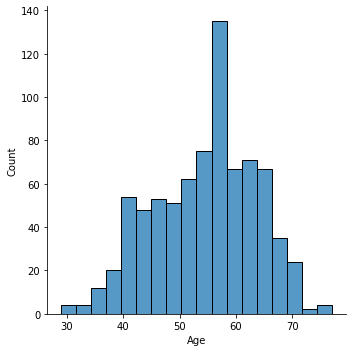

In [23]:
plt.figure(figsize=(15, 15), dpi=150)
sns.displot(train_patient, x="Age")

In [24]:
def Age_categorise(df):
    train_patient['Age_Cat'] = pd.qcut(train_patient.Age, q=4, labels = ['Young adult [29,40]','Adult1 [40,50]','Adult2 [50,60]','Senior [60,100]'])
    
Age_categorise(train_patient)
train_patient['Age_Cat'].dtype

CategoricalDtype(categories=['Young adult [29,40]', 'Adult1 [40,50]', 'Adult2 [50,60]',
                  'Senior [60,100]'],
, ordered=True)

In [25]:
train_patient.groupby("Age_Cat").mean()

,Birth_Year,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,BMI
Age_Cat,,,,,,,,,,
"Young adult [29,40]",1979.518868,0.683962,168.382075,70.452830,233.443396,123.834906,20.202830,2.900943,42.481132,24.769340
"Adult1 [40,50]",1969.207921,0.589109,167.970297,67.767327,252.732673,130.089109,17.495050,4.599010,52.792079,23.981683
"Adult2 [50,60]",1963.391753,0.298969,168.170103,67.979381,248.072165,136.020619,16.716495,5.262887,58.608247,24.000722
"Senior [60,100]",1956.255556,0.472222,166.838889,65.100000,261.894444,135.677778,14.383333,5.505556,65.744444,23.373278


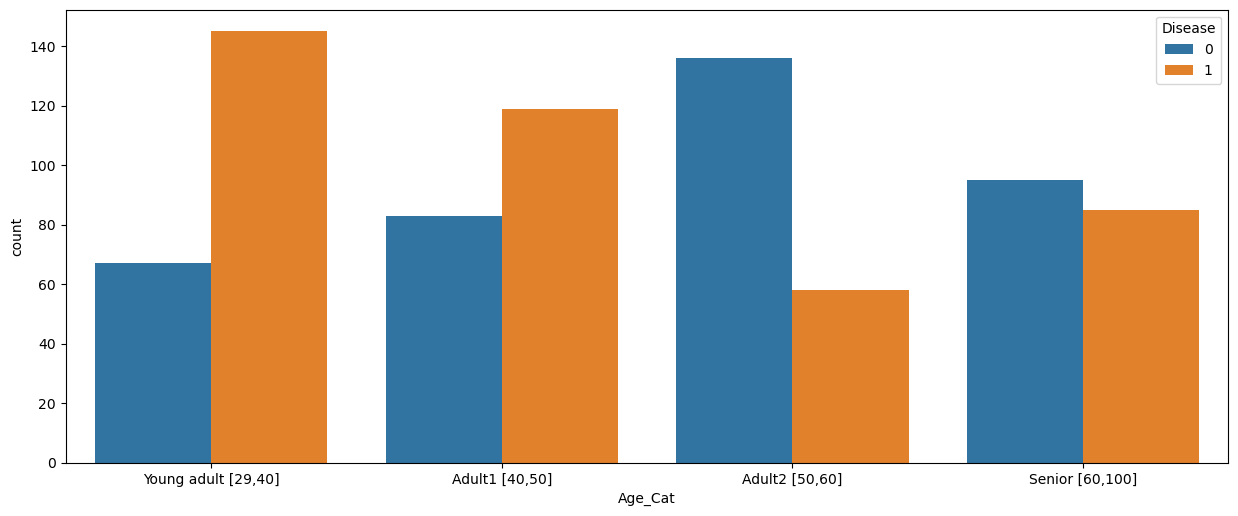

In [26]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Age_Cat", hue = "Disease", data = train_patient)
plt.show()

In [27]:
Age_Cat_counts = pd.DataFrame(train_patient['Age_Cat'].value_counts())
Age_Cat_counts['%'] = (train_patient["Age_Cat"].value_counts()/len(train_patient["Age_Cat"])*100).round(2)
Age_Cat_counts

,Age_Cat,%
"Young adult [29,40]",212,26.90
"Adult1 [40,50]",202,25.63
"Adult2 [50,60]",194,24.62
"Senior [60,100]",180,22.84


In [28]:
Age_Cat_Diseases_counts = pd.DataFrame(train_patient.groupby(['Age_Cat','Disease']).Age_Cat.count())
Age_Cat_Diseases_counts['%'] = (train_patient["Age_Cat"].value_counts()/len(Age_Cat_Diseases_counts["Age_Cat"])*100).round(2)
Age_Cat_Diseases_counts

Age_Cat   %
Age_Cat             Disease             
Young adult [29,40] 0             67 NaN
                    1            145 NaN
Adult1 [40,50]      0             83 NaN
                    1            119 NaN
Adult2 [50,60]      0            136 NaN
                    1             58 NaN
Senior [60,100]     0             95 NaN
                    1             85 NaN

In [29]:
def Colesterol_categorise(df):
    train_patient['Cholesterol_Cat'] = pd.cut(train_patient.High_Cholesterol, bins = [0,200,240,float("inf")], labels = ['Desirable','Borderline High','High'])
    
Colesterol_categorise(train_patient)
train_patient['Cholesterol_Cat'].dtype

CategoricalDtype(categories=['Desirable', 'Borderline High', 'High'], ordered=True)

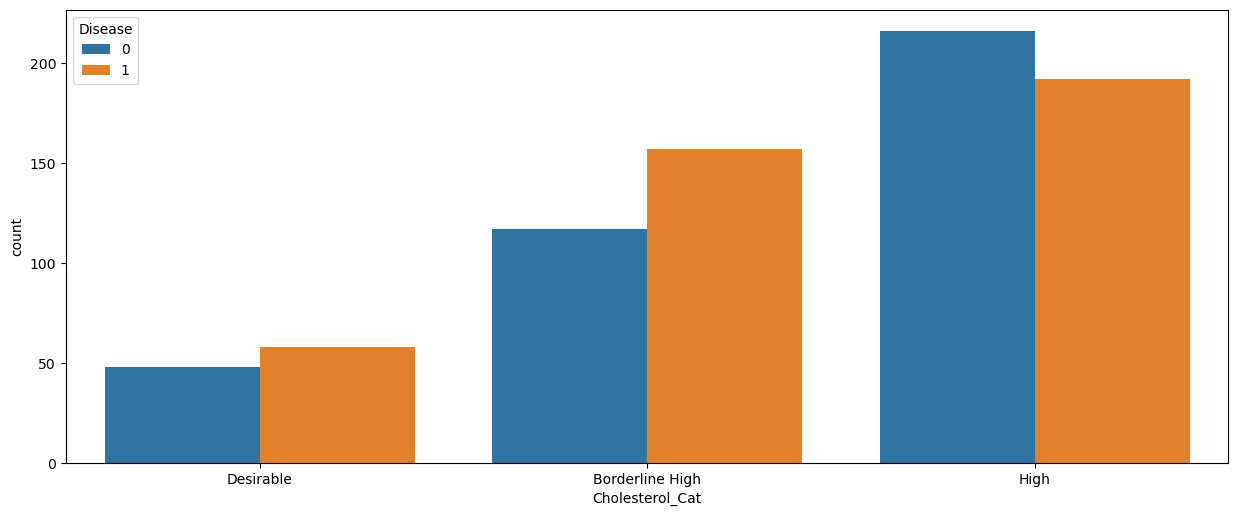

In [30]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Cholesterol_Cat", hue = "Disease", data = train_patient)
plt.show()

In [31]:
Cholesterol_Cat_counts = pd.DataFrame(train_patient['Cholesterol_Cat'].value_counts())
Cholesterol_Cat_counts['%'] = (train_patient["Cholesterol_Cat"].value_counts()/len(train_patient["Cholesterol_Cat"])*100).round(2)
Cholesterol_Cat_counts.style.set_caption("Cholesterol Categories")
Cholesterol_Cat_counts

,Cholesterol_Cat,%
High,408,51.78
Borderline High,274,34.77
Desirable,106,13.45


In [32]:
train_patient.Mental_Health.describe()

count    788.000000
mean      17.321066
std        5.405039
min        0.000000
25%       13.000000
50%       18.000000
75%       21.000000
max       29.000000
Name: Mental_Health, dtype: float64

In [33]:
def Mental_Health_categorise(df):
    train_patient['Mental_Health_Cat'] = pd.qcut(train_patient.Mental_Health, q=4, labels = ['Good','Medium','Bad','Very bad'])
    
Mental_Health_categorise(train_patient)
train_patient['Mental_Health_Cat'].dtype

CategoricalDtype(categories=['Good', 'Medium', 'Bad', 'Very bad'], ordered=True)

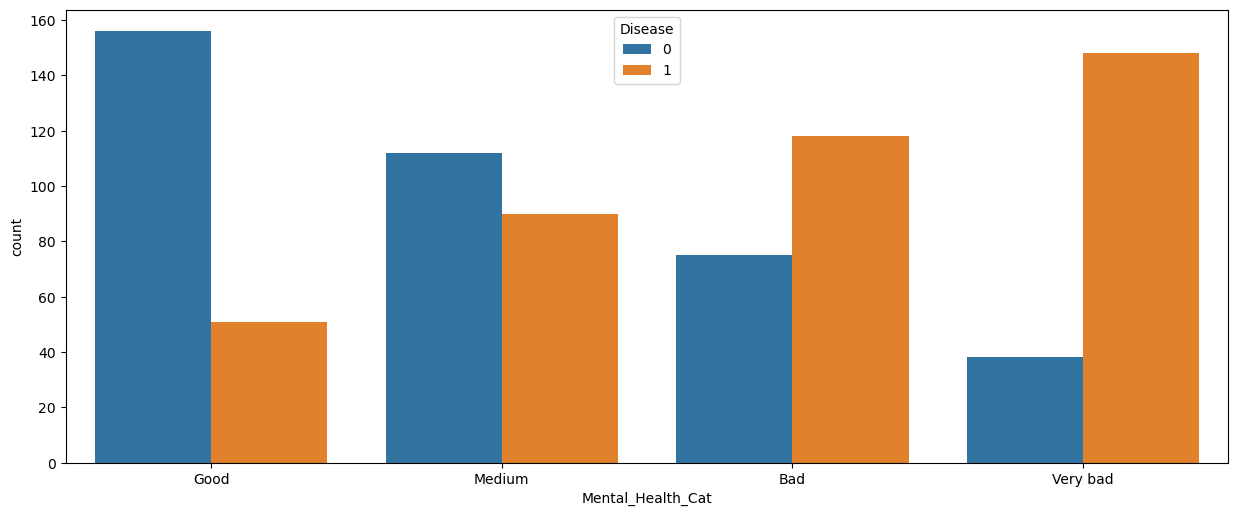

In [34]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Mental_Health_Cat", hue = "Disease", data = train_patient)
plt.show()

In [35]:
Mental_Health_Cat_counts = pd.DataFrame(train_patient['Mental_Health_Cat'].value_counts())
Mental_Health_Cat_counts['%'] = (train_patient["Mental_Health_Cat"].value_counts()/len(train_patient["Mental_Health_Cat"])*100).round(2)
Mental_Health_Cat_counts

,Mental_Health_Cat,%
Good,207,26.27
Medium,202,25.63
Bad,193,24.49
Very bad,186,23.60


In [36]:
train_patient.Physical_Health.describe()

count    788.000000
mean       4.512690
std        5.373339
min        0.000000
25%        0.000000
50%        3.000000
75%        7.000000
max       30.000000
Name: Physical_Health, dtype: float64

<Figure size 2250x2250 with 0 Axes>

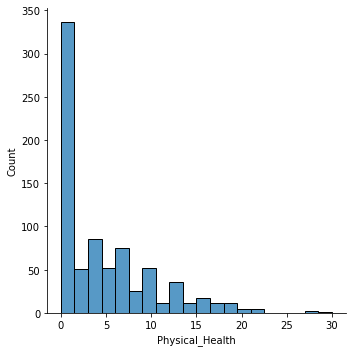

In [37]:
plt.figure(figsize=(15, 15), dpi=150)
sns.displot(train_patient, x="Physical_Health")

In [38]:
def Physical_Health_categorise(df):
    train_patient['Physical_Health_Cat'] = pd.cut(train_patient.Physical_Health, bins = [0,10,20,30], labels = ['Good','Medium','Bad'])
                                                                                                               
Physical_Health_categorise(train_patient)
train_patient['Physical_Health_Cat'].dtype

CategoricalDtype(categories=['Good', 'Medium', 'Bad'], ordered=True)

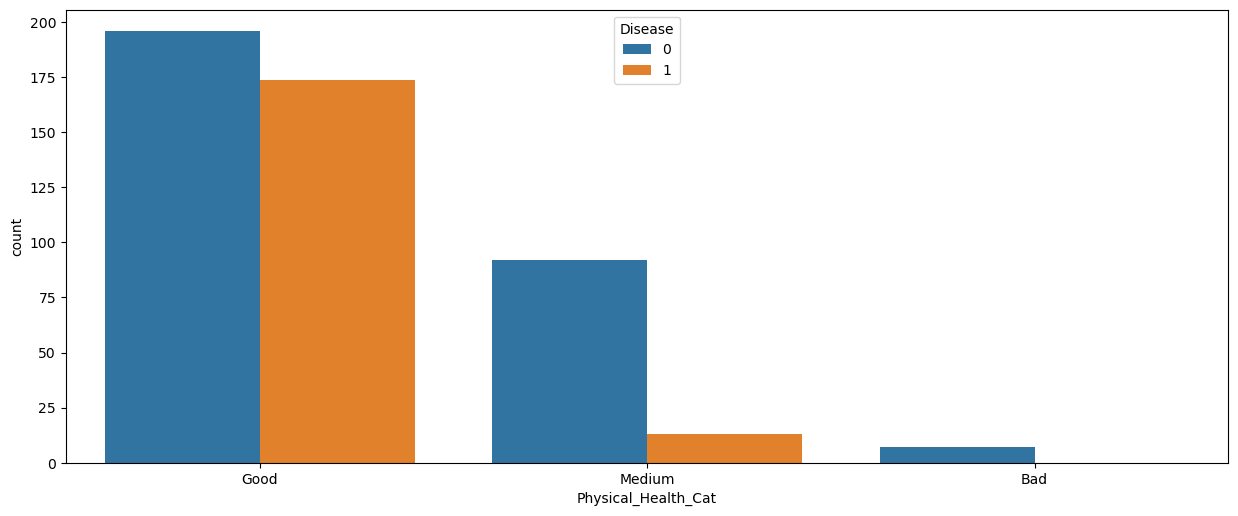

In [39]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Physical_Health_Cat", hue = "Disease", data = train_patient)
plt.show()

In [40]:
Physical_Health_Cat_counts = pd.DataFrame(train_patient['Physical_Health_Cat'].value_counts())
Physical_Health_Cat_counts['%'] = (train_patient["Physical_Health_Cat"].value_counts()/len(train_patient["Physical_Health_Cat"])*100).round(2)
Physical_Health_Cat_counts

,Physical_Health_Cat,%
Good,370,46.95
Medium,105,13.32
Bad,7,0.89


In [41]:
train_patient.BMI.describe()

count    788.000000
mean      24.059302
std        3.651810
min       16.980000
25%       20.860000
50%       24.385000
75%       27.145000
max       30.120000
Name: BMI, dtype: float64

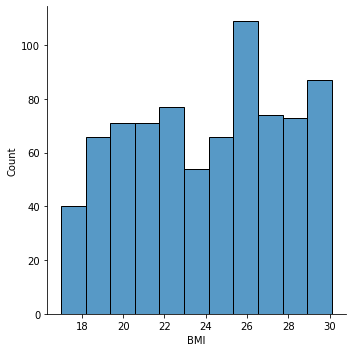

In [42]:
sns.displot(train_patient, x="BMI")

In [43]:
def BMI_categorise(df):
     train_patient['BMI_Cat'] = pd.cut(train_patient.BMI, bins = [0,18.5,25,30,float("inf")], labels = ['Underweight','Healthy','Overweight','Obesity'])
                                                                                                               
BMI_categorise(train_patient)
train_patient['BMI_Cat'].dtype

CategoricalDtype(categories=['Underweight', 'Healthy', 'Overweight', 'Obesity'], ordered=True)

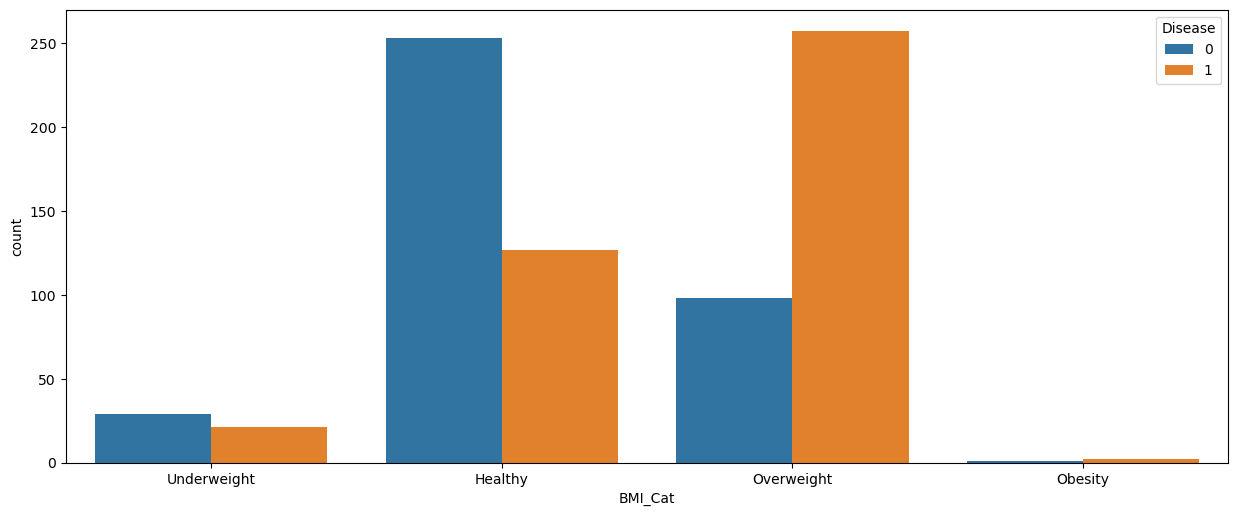

In [44]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "BMI_Cat", hue = "Disease", data = train_patient)
plt.show()

In [45]:
BMI_Cat_counts = pd.DataFrame(train_patient['BMI_Cat'].value_counts())
BMI_Cat_counts['%'] = (train_patient["BMI_Cat"].value_counts()/len(train_patient["BMI_Cat"])*100).round(2)
BMI_Cat_counts

,BMI_Cat,%
Healthy,380,48.22
Overweight,355,45.05
Underweight,50,6.35
Obesity,3,0.38


In [46]:
train_patient.Blood_Pressure.describe()

count    788.000000
mean     131.143401
std       17.075243
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: Blood_Pressure, dtype: float64

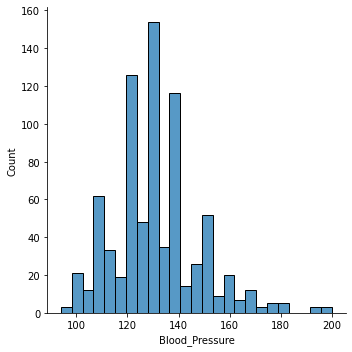

In [47]:
sns.displot(train_patient, x="Blood_Pressure")

In [48]:
def Blood_Pressure_categorise(df):
    train_patient['Blood_Pressure_Cat'] = pd.qcut(train_patient.Blood_Pressure, q=4, labels = ['Low',"Regular","High","Very High"])
    
Blood_Pressure_categorise(train_patient)
train_patient['Blood_Pressure_Cat'].dtype

CategoricalDtype(categories=['Low', 'Regular', 'High', 'Very High'], ordered=True)

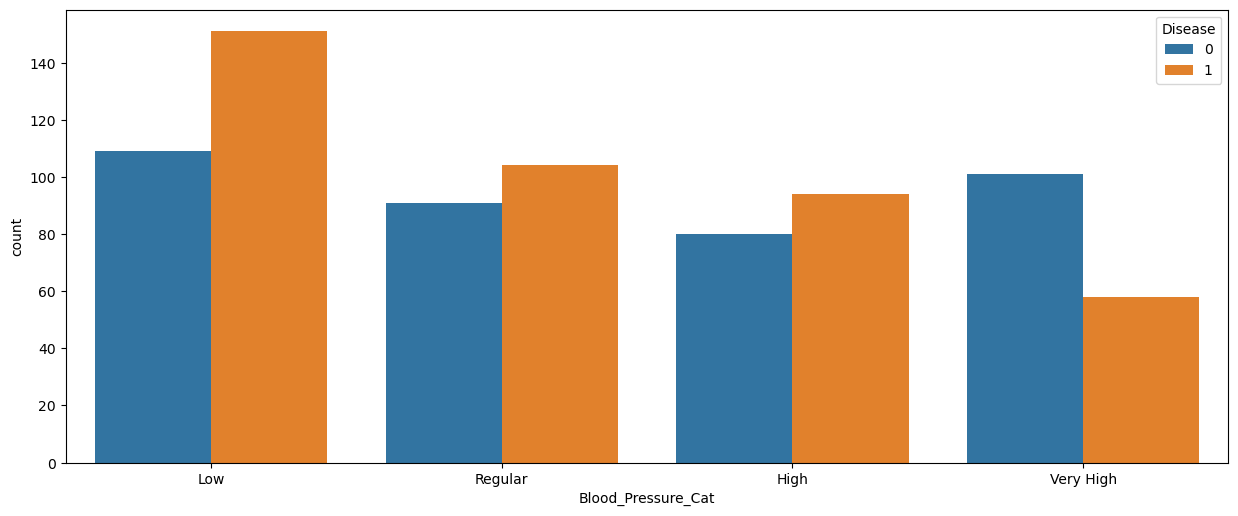

In [49]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Blood_Pressure_Cat", hue = "Disease", data = train_patient)
plt.show()

In [50]:
Blood_Pressure_Cat_counts = pd.DataFrame(train_patient['Blood_Pressure_Cat'].value_counts())
Blood_Pressure_Cat_counts['%'] = (train_patient["Blood_Pressure_Cat"].value_counts()/len(train_patient["Blood_Pressure_Cat"])*100).round(2)
Blood_Pressure_Cat_counts

,Blood_Pressure_Cat,%
Low,260,32.99
Regular,195,24.75
High,174,22.08
Very High,159,20.18


<Figure size 1500x600 with 0 Axes>

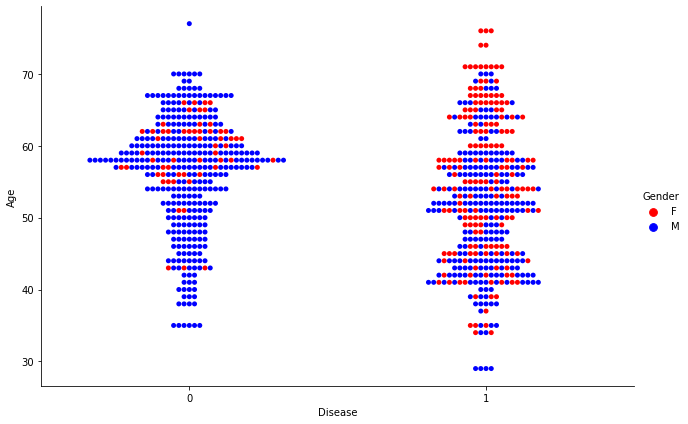

In [51]:
plt.figure(figsize=(15, 6), dpi=100)
sns.catplot(data=train_patient, y="Age", x="Disease", hue="Gender", kind="swarm", height=6, aspect=1.5,palette=sns.color_palette(['red', 'blue']))

<Figure size 1500x600 with 0 Axes>

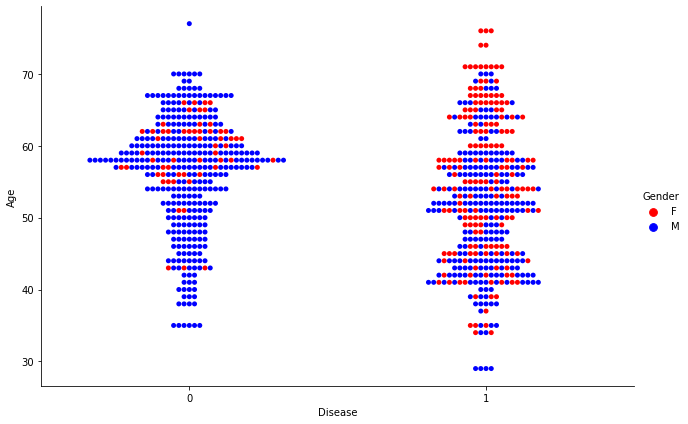

In [52]:
plt.figure(figsize=(15, 6), dpi=100)
sns.catplot(data=train_patient, y="Age", x="Disease", hue="Gender", kind="swarm", height=6, aspect=1.5,palette=sns.color_palette(['red', 'blue']))

(0.0, 100.0)

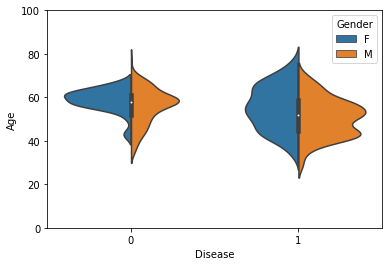

In [53]:
sns.violinplot(data=train_patient, y="Age", x="Disease", hue="Gender", split=True, height=10, aspect=5);
plt.ylim(0, 100)

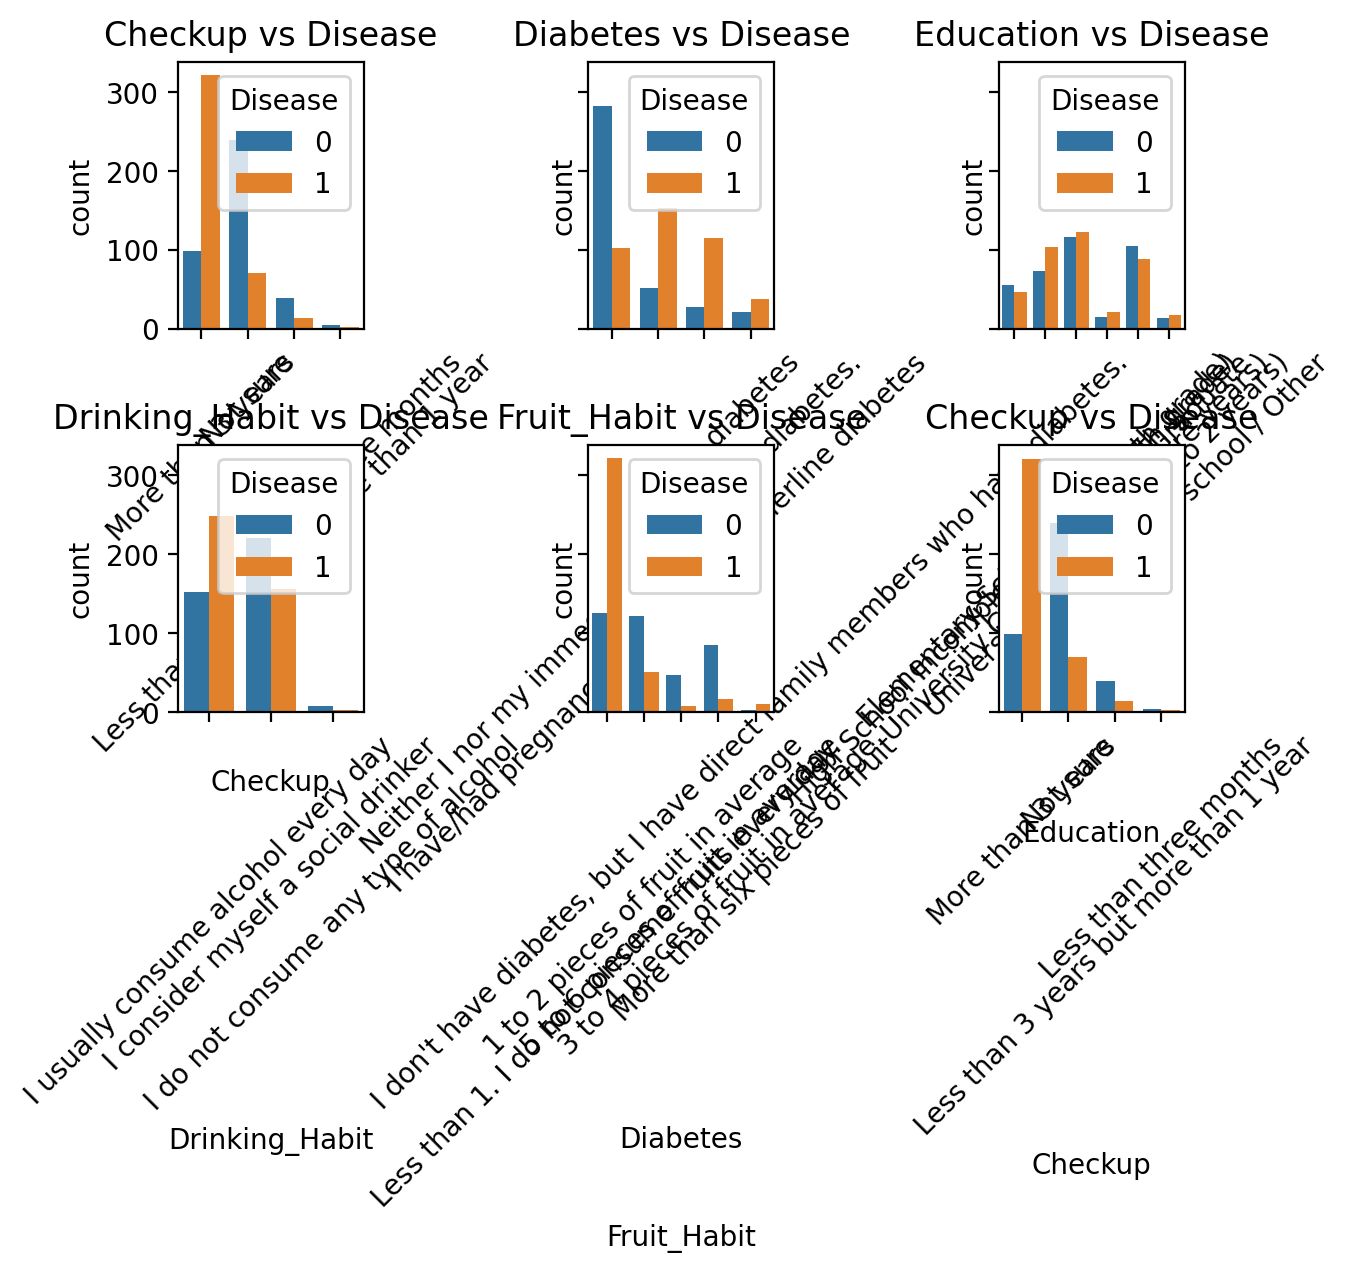

In [54]:
l=["Education","Drinking_Habit","Fruit_Habit","Checkup","Diabetes"]
figure, axes = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=False, dpi=200)
index = -2
axes = axes.flatten()
for axis in axes:
    sns.countplot(x = l[index], hue = "Disease", data = train_patient, ax=axis)
    axis.set_title(l[index]+' vs Disease')
    index = index+1
    plt.tight_layout()
    for tick in axis.get_xticklabels():
        tick.set_rotation(45)
plt.show()

In [55]:
sns.countplot(x = train_patient["Education"], hue = "Disease", data = train_patient, ax=axis)
axis.set_title(l[index]+' vs Disease')

Text(0.5, 1.0, 'Diabetes vs Disease')

In [56]:
train_patient['Education'].value_counts()

University Complete (3 or more years)          239
High School Graduate                           193
Elementary School (1st to 9th grade)           177
High School Incomplete (10th to 11th grade)    101
University Incomplete (1 to 2 years)            36
I never attended school / Other                 30
Name: Education, dtype: int64

Since Education is a categorical variable, we had to encode it into a numerical variable so that it could be used by the models. This step also allowed us to impute the missing values which couldn't be done otherwise.

In [57]:
train_patient['Education'].replace(to_replace = 'University Complete (3 or more years)',value = 5, inplace = True)
train_patient['Education'].replace(to_replace = 'University Incomplete (1 to 2 years)',value = 4, inplace = True)
train_patient['Education'].replace(to_replace = 'High School Graduate',value = 3, inplace = True)
train_patient['Education'].replace(to_replace = 'High School Incomplete (10th to 11th grade)',value = 2, inplace = True)
train_patient['Education'].replace(to_replace = 'Elementary School (1st to 9th grade)',value = 1, inplace = True)
train_patient['Education'].replace(to_replace = 'I never attended school / Other',value = 0, inplace = True)
train_patient['Education'].value_counts()

5.0    239
3.0    193
1.0    177
2.0    101
4.0     36
0.0     30
Name: Education, dtype: int64

In [58]:
train_patient['Drinking_Habit'].value_counts()

I usually consume alcohol every day     400
I consider myself a social drinker      377
I do not consume any type of alcohol     11
Name: Drinking_Habit, dtype: int64

In [59]:
train_patient['Drinking_Habit'].replace(to_replace = 'I usually consume alcohol every day',value = 2, inplace = True)
train_patient['Drinking_Habit'].replace(to_replace = 'I consider myself a social drinker',value = 1, inplace = True)
train_patient['Drinking_Habit'].replace(to_replace = 'I do not consume any type of alcohol',value = 0, inplace = True)
train_patient['Drinking_Habit'].value_counts()

2    400
1    377
0     11
Name: Drinking_Habit, dtype: int64

In [60]:
train_patient['Fruit_Habit'].value_counts()

Less than 1. I do not consume fruits every day.    447
1 to 2 pieces of fruit in average                  173
3 to 4 pieces of fruit in average                  101
5 to 6 pieces of fruit in average                   55
More than six pieces of fruit                       12
Name: Fruit_Habit, dtype: int64

In [61]:
train_patient['Fruit_Habit'].replace(to_replace = 'More than six pieces of fruit',value = 4, inplace = True)
train_patient['Fruit_Habit'].replace(to_replace = '5 to 6 pieces of fruit in average',value = 3, inplace = True)
train_patient['Fruit_Habit'].replace(to_replace = '3 to 4 pieces of fruit in average',value = 2, inplace = True)
train_patient['Fruit_Habit'].replace(to_replace = '1 to 2 pieces of fruit in average',value = 1, inplace = True)
train_patient['Fruit_Habit'].replace(to_replace = 'Less than 1. I do not consume fruits every day.',value = 0, inplace = True)
train_patient['Fruit_Habit'].value_counts()

0    447
1    173
2    101
3     55
4     12
Name: Fruit_Habit, dtype: int64

In [62]:
train_patient['Water_Habit'].value_counts()

Between one liter and two liters                  359
More than half a liter but less than one liter    346
Less than half a liter                             83
Name: Water_Habit, dtype: int64

In [63]:
train_patient['Water_Habit'].replace(to_replace = 'Between one liter and two liters',value = 2, inplace = True)
train_patient['Water_Habit'].replace(to_replace = 'More than half a liter but less than one liter',value = 1, inplace = True)
train_patient['Water_Habit'].replace(to_replace = 'Less than half a liter',value = 0, inplace = True)
train_patient['Water_Habit'].value_counts()

2    359
1    346
0     83
Name: Water_Habit, dtype: int64

In [64]:
train_patient['Checkup'].value_counts()

More than 3 years                         420
Not sure                                  309
Less than 3 years but more than 1 year     53
Less than three months                      6
Name: Checkup, dtype: int64

In [65]:
train_patient['Checkup'].replace(to_replace = 'Less than three months',value = 3, inplace = True)
train_patient['Checkup'].replace(to_replace = 'Less than 3 years but more than 1 year',value = 2, inplace = True)
train_patient['Checkup'].replace(to_replace = 'More than 3 years',value = 1, inplace = True)
train_patient['Checkup'].replace(to_replace = 'Not sure',value = 0, inplace = True)
train_patient['Checkup'].value_counts()

1    420
0    309
2     53
3      6
Name: Checkup, dtype: int64

In [66]:
train_patient['Diabetes'].value_counts()

Neither I nor my immediate family have diabetes.                              384
I have/had pregnancy diabetes or borderline diabetes                          204
I do have diabetes                                                            142
I don't have diabetes, but I have direct family members who have diabetes.     58
Name: Diabetes, dtype: int64

In [67]:
train_patient['Diabetes'].replace(to_replace = 'Neither I nor my immediate family have diabetes.',value = 3, inplace = True)
train_patient['Diabetes'].replace(to_replace = "I don't have diabetes, but I have direct family members who have diabetes.",value = 2, inplace = True)
train_patient['Diabetes'].replace(to_replace = 'I have/had pregnancy diabetes or borderline diabetes',value = 1, inplace = True)
train_patient['Diabetes'].replace(to_replace = 'I do have diabetes',value = 0, inplace = True)
train_patient['Diabetes'].value_counts()

3    384
1    204
0    142
2     58
Name: Diabetes, dtype: int64

Imputing the missing values of Education with the KNNImputer.

In [68]:
imputer = KNNImputer(n_neighbors=5)

imputer.fit(train_patient['Education'].values.reshape(-1, 1))
train_patient['Education'] = imputer.transform(train_patient['Education'].values.reshape(-1, 1))

Checking that we no longer have missing values.

In [69]:
train_patient.isna().sum()

Name                     0
Birth_Year               0
Region                   0
Education                0
Disease                  0
Height                   0
Weight                   0
High_Cholesterol         0
Blood_Pressure           0
Mental_Health            0
Physical_Health          0
Checkup                  0
Diabetes                 0
Smoking_Habit            0
Drinking_Habit           0
Exercise                 0
Fruit_Habit              0
Water_Habit              0
Gender                   0
Age                      0
BMI                      0
Age_Cat                  0
Cholesterol_Cat          0
Mental_Health_Cat        0
Physical_Health_Cat    306
BMI_Cat                  0
Blood_Pressure_Cat       0
dtype: int64

### 3.x Outlier analysis

### 3.x Scaling

Since variables that are measured at different scales do not contribute equally to the model fitting and model learned function and might end up creating a bias, we will deal with this potential problem by applying a Robust Scaler.

In [71]:
scaler = RobustScaler().fit(train_patient)
robust_data = scaler.transform(train_patient)

train_patient = pd.DataFrame(robust_data, columns = train_patient.columns)
train_patient.head()

ValueError: could not convert string to float: 'Mrs. Stephanie Gay'

### 3.x Feature Selection

Checking if any of the numerical variables is univariate (variance is equal to 0).

In [17]:
x_train_num_scaled.var()

NameError: name 'x_train_num_scaled' is not defined

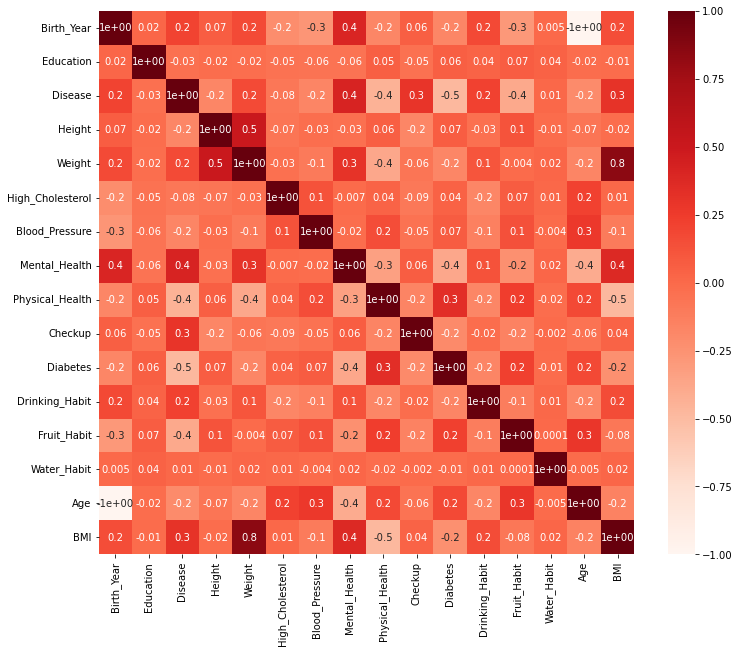

In [73]:
#Pearson correlation
cor_pearson= train_patient.corr(method ='pearson')
#Heatmap function defined
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
#print correlation
cor_heatmap(cor_pearson)

In [76]:
anova = SelectKBest(f_classif, k=15)
#X_anova = anova.fit_transform(train_patient, validate_patient) temos de fazer o split para ter o validate
selected_features = pd.Series(anova.get_support(), index = X_train.columns)
selected_features

TypeError: fit() missing 1 required positional argument: 'y'

## 4. Modelling

## 5. Assessment